<a href="https://colab.research.google.com/github/ToHLz/Machine-learning/blob/main/NLP_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np

# libraries for data preprocessing
import nltk
# download modules available with NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# libraries for data split and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 

RANDOM_SEED = 100

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# load the data set
# Here I am loading the train dataset to train the model
df = pd.read_csv('https://raw.githubusercontent.com/ToHLz/Machine-learning/main/train.csv')

print(df.shape)
df.head()

(16363, 3)


,Id,Text,Sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


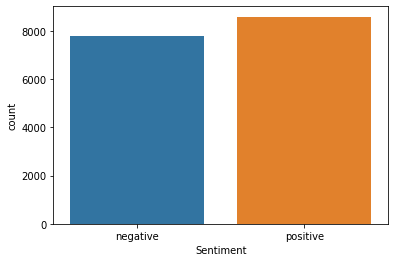

In [ ]:
# Summarise class details
sns.countplot(x=df['Sentiment'])

Data cleaning

Here , i am going to find if any missing values are there in the dataset

In [ ]:
# drop the rows where at least one element is missing
df = df.dropna()

print(f'Number of entries: {len(df)}')

Number of entries: 16363


Tokenisation

Under Text Preprocessing, there are 2 tokenizers as follows.

word_tokenize - Tokenizer for normal text

TweetTokenizer - Tokenizer for tweets

In this data set, we have normal text. 

Then we can use TweetTokenizer.

In [ ]:
tknzr = TweetTokenizer()
# iterate through each row in 'Text' columm and convert text to tokens
list_tokenised_text = [tknzr.tokenize(text) for text in df['Text']]
print(list_tokenised_text[:2])

list_tokenised_sentences = [' '.join(tokens) for tokens in list_tokenised_text]
print(list_tokenised_sentences[:2])

# add new column to data frame
df['Tokenised_Text'] = list_tokenised_sentences
df.head()

[['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'here', 'in', 'San', 'Diego', '!', '!', '!'], ['my', 'boss', 'is', 'bullying', 'me', '...']]
['Sooo SAD I will miss you here in San Diego ! ! !', 'my boss is bullying me ...']


,Id,Text,Sentiment,Tokenised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of * * * , why couldn ` t they put them o..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...


Text normalisation

lemmatization - Lemmatisation is an more organised procedure to obtain the base form of a word (lemma) with the use of a vocabulary and morphological analysis (word structure and grammar relations) of words.

In [ ]:
wnl = WordNetLemmatizer()

list_lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in list_tokenised_text:
  lemma_words = [wnl.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  list_lemmatised_sentences.append(lemma_sentence)
  
print(list_lemmatised_sentences[:2])

# add new column to data frame
df['Lemmatised_Text'] = list_lemmatised_sentences

df.head()

['Sooo SAD I will miss you here in San Diego ! ! !', 'my bos is bullying me ...']


,Id,Text,Sentiment,Tokenised_Text,Lemmatised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...,my bos is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of * * * , why couldn ` t they put them o...","Sons of * * * , why couldn ` t they put them o..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...


In [ ]:
# save updated data frame to a file
# This step is optional for the main flow. But by saving data to a file you can analyse the preprocessed text output more deeply. 
df.to_csv('/content/reviews_preprocessed.csv', index=False)

df.head()

,Id,Text,Sentiment,Tokenised_Text,Lemmatised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...,my bos is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of * * * , why couldn ` t they put them o...","Sons of * * * , why couldn ` t they put them o..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...


Stop word removal

To convert text into numeric features, we use vectorizers (CountVectorizer, TfidfVectorizer). Stop word removal can be easily done by giving a stop word list as an argument to the vectorizer. So, during the preprocessing step, we need to figure out a suitable stop word list.

Let's look at the English stop words list available with NLTK library.

In [ ]:
# get English stopwords
stop_words = set(stopwords.words('english')) 
print(stop_words)

{"didn't", 'our', 'an', 'nor', 'into', 'hasn', 'with', 'can', 'but', 'each', 'then', 'than', 'the', 'being', 'why', 'me', 'a', "shan't", 'after', 'as', 'only', "needn't", 'of', 'such', 'if', 'who', "mustn't", 'her', "she's", 'himself', 've', 'needn', "don't", 'weren', 'is', 'or', "doesn't", 'itself', 'aren', 'i', "you're", 'there', 'their', 'because', 'through', 'once', 'while', 'have', 'during', 'between', 'off', 'does', 'haven', 'that', 'to', "wouldn't", 'over', 'has', 'them', 'ain', 'ours', 'few', 's', 'against', 'below', 'should', "should've", 'doesn', 'from', 'in', 'no', 'ourselves', 'they', 'ma', 'at', 'm', "weren't", 'and', 'o', "you'll", 'so', 'this', 'some', 'most', 'again', 'what', 'myself', 'shan', 'was', 'y', 'when', 'here', "couldn't", "that'll", 'shouldn', 'wouldn', 'own', 'how', 'be', 'up', 'didn', 'where', 'yourselves', 'any', 'd', 'herself', 'whom', 'having', 'isn', 'just', 'for', "mightn't", 'll', 'hadn', 're', 'more', 'yours', "wasn't", "hasn't", "you've", 'which', '

Text feature extraction and model generation

We can convert text into numeric features using term occurrence vectors or tf-idf vectors. This conversion can be easily done using CountVectorizer or TfidfVectorizer.

As classification algorithms, you learned SVM, Naive Bayes and decision trees under Machine Learning module. To make things simpler, let's focus on SVM for our initial experiments to understand the impact by different data preprocessing techniques and features. Later we can extend the experiments to other algorithms.

As the first step, we need to separate data into a training set and validation set.

Since we are going to evaluate the models trained using raw (original) text, tokenised text and lemmatised text, in below, I create 3 train and test set pairs using the columns: 'Text', 'Tokenised_Text' and 'Lemmatised_Text'.

In [ ]:
# use raw text
X_train_text, X_val_text, y_train, y_val = train_test_split(df['Text'], df['Sentiment'], test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train_text)}')
print(f'validation data set size: {len(X_val_text)}')

# use tokenised text
X_train_tokenised_text, X_val_tokenised_text, y_train, y_val = train_test_split(df['Tokenised_Text'], df['Sentiment'], test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train_tokenised_text)}')
print(f'validation data set size: {len(X_val_tokenised_text)}')

# use lemmatised text
X_train_lemmatised_text, X_val_lemmatised_text, y_train, y_val = train_test_split(df['Lemmatised_Text'], df['Sentiment'], test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train_lemmatised_text)}')
print(f'validation data set size: {len(X_val_lemmatised_text)}')

# define class_names to using with plot_confusion_matrix
class_list = ['positive', 'negative']

training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909


In [ ]:
# method to plot confusion matrix
def plot_confusion_matrix(matrix, class_names):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions, class_names):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=class_names)
  return accuracy, confusion_matrix

SVM

In [ ]:
# method to train and predict using SVM classifier
def get_svm_predictions(X_train, X_val, y_train, y_val, class_names):
  # build model
  clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_names)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_names)

  return clf

Model M1

Data preprocessing - lower casing, punctuation removal

Features - term occurrence vector (1-grams)

Algorithm - SVM

Accuracy: 0.8602566714198411


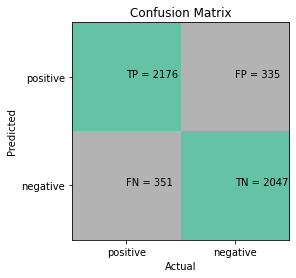

In [ ]:
vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m1 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

Model M2

Data preprocessing - lower casing, punctuation removal

Features - tf-idf vector (1-grams)

Algorithm - SVM

Accuracy: 0.8690160928906091


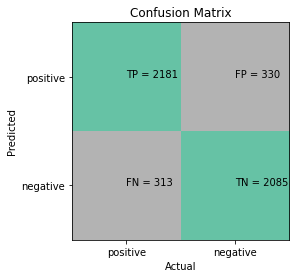

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m2 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

According to the measures accuracy values model M2 is more accurate than model M1.

Model M3

Data preprocessing - lower casing, punctuation removal, tokenisation(NLTK)

Features - tf-idf vector (1-grams)

Algorithm - SVM

Accuracy: 0.8698309227948666


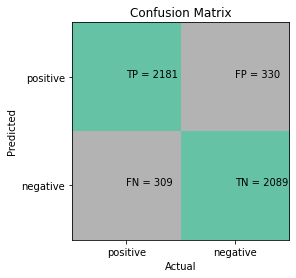

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m3 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

Model M4

Data preprocessing - lower casing, punctuation removal, lemmatisation(WordNet)

Features - tf-idf vector (1-grams)

Algorithm - SVM

Accuracy: 0.8682012629863516


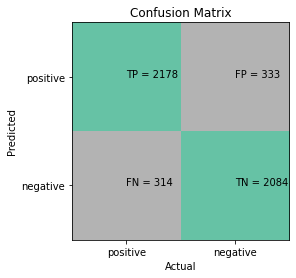

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m4 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

Model M5

Data preprocessing - lower casing, punctuation removal, tokenisation(NLTK), 
stop word removal

Features - tf-idf vector (1-grams)

Algorithm - SVM

Accuracy: 0.8586270116113262


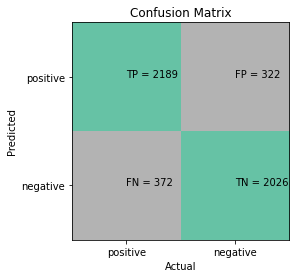

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m5 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

Model M6

Data preprocessing - lower casing, punctuation removal, lemmatisation(WordNet), stop word removal

Features - tf-idf vector (1-grams)

Algorithm - SVM

Accuracy: 0.8588307190873905


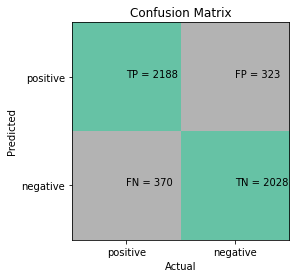

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m6 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

Other algorithms

Decision Tree

In [ ]:
# method to train and predict using Decision Tree
def get_dt_predictions(X_train, X_val, y_train, y_val, class_list):
  # build model
  clf = tree.DecisionTreeClassifier(random_state=RANDOM_SEED)
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_list)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_list)

  return clf

Data preprocessing - lower casing, punctuation removal

Features - tf-idf vector (1-grams)

Algorithm - DecisionTreeClassifier

Accuracy: 0.8054593603585252


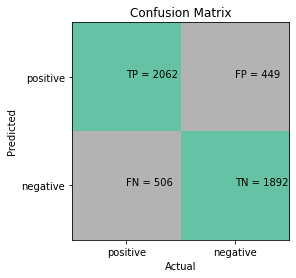

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m3 = get_dt_predictions(X_train, X_val, y_train, y_val, class_list)

Accuracy: 0.8056630678345895


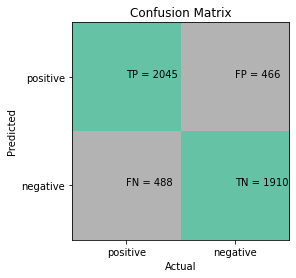

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m7 = get_dt_predictions(X_train, X_val, y_train, y_val, class_list)

Predictions

In [ ]:
test_reviews = ["My absolute favorite Yogi tea!  Pleasantly spicy, with a hint of rich chocolate.  I much prefer this to the Mayan Cocoa Spice & Sweet Thai flavors.  It's what I reach for when I get a craving for a cup of hot chocolate but don't want the calories.",
                "The price is good, size is perfect...but my dog doesn't like them at all. Would not buy again sorry. Not the products fault",
                "My dog loves the taste of these...they're a nice change from rawhides..I feel like I can give him treats more often",
                "I buy stuff like this for the grand kids. I think they liked it.  I cannot eat pre-packaged foods due to health concerns. I haven't heard anything negative, so it must have been ok.",
                "Yuck!  This is the first time this tasted bland.  Is something different with this batch?"]


Let's use the best model we have created so far to make predictions for test data.

M3 is the best

In [ ]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df = pd.read_csv('https://raw.githubusercontent.com/ToHLz/Machine-learning/main/test.csv')

print(df.shape)
df.head()

(1000, 2)


,Id,Text
0,96d74cb729,Shanghai is also really exciting (precisely -...
1,eee518ae67,"Recession hit Veronique Branquinho, she has to..."
2,01082688c6,happy bday!
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!
4,726e501993,that`s great!! weee!! visitors!


In [ ]:
# iterate through each row in 'Text' columm and convert text to tokens
tknzr = TweetTokenizer()
list_tokenised_text = [tknzr.tokenize(text) for text in df['Text']]
print(list_tokenised_text[:2])

list_tokenised_sentences = [' '.join(tokens) for tokens in list_tokenised_text]
print(list_tokenised_sentences[:2])

# add new column to data frame
df['Tokenised_Text'] = list_tokenised_sentences
df.head()

[['Shanghai', 'is', 'also', 'really', 'exciting', '(', 'precisely', '-', '-', 'skyscrapers', 'galore', ')', '.', 'Good', 'tweeps', 'in', 'China', ':', '(', 'SH', ')', '(', 'BJ', ')', '.'], ['Recession', 'hit', 'Veronique', 'Branquinho', ',', 'she', 'has', 'to', 'quit', 'her', 'company', ',', 'such', 'a', 'shame', '!']]
['Shanghai is also really exciting ( precisely - - skyscrapers galore ) . Good tweeps in China : ( SH ) ( BJ ) .', 'Recession hit Veronique Branquinho , she has to quit her company , such a shame !']


,Id,Text,Tokenised_Text
0,96d74cb729,Shanghai is also really exciting (precisely -...,Shanghai is also really exciting ( precisely -...
1,eee518ae67,"Recession hit Veronique Branquinho, she has to...","Recession hit Veronique Branquinho , she has t..."
2,01082688c6,happy bday!,happy bday !
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!,http://twitpic.com/4w75p - I like it ! !
4,726e501993,that`s great!! weee!! visitors!,that ` s great ! ! weee ! ! visitors !


Accuracy: 0.8698309227948666


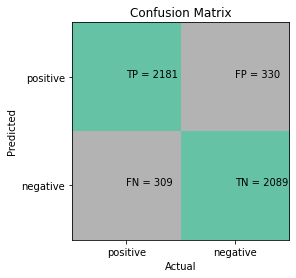

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m3 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

We are going to apply the same preprocessing techniques used with model's training data to test data.

In [ ]:
# drop the rows where at least one element is missing
df = df.dropna()

print(f'Number of entries: {len(df)}')

Number of entries: 1000


Accuracy: 0.8698309227948666


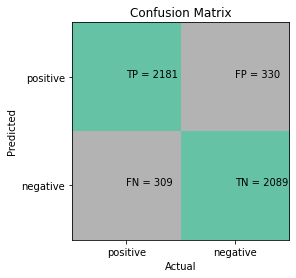

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m3 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

In [ ]:
X_test = vectorizer.transform(df['Text'])
predictions = m3.predict(X_test)
print(predictions)

['positive' 'negative' 'positive' 'positive' 'positive' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'negative' 'negative'
 'negative' 'positive' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'positive' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'positive' 'negative' 'negative' 'posit

In [ ]:
df['Sentiment'] = predictions
df

,Id,Text,Tokenised_Text,Sentiment
0,96d74cb729,Shanghai is also really exciting (precisely -...,Shanghai is also really exciting ( precisely -...,positive
1,eee518ae67,"Recession hit Veronique Branquinho, she has to...","Recession hit Veronique Branquinho , she has t...",negative
2,01082688c6,happy bday!,happy bday !,positive
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!,http://twitpic.com/4w75p - I like it ! !,positive
4,726e501993,that`s great!! weee!! visitors!,that ` s great ! ! weee ! ! visitors !,positive
...,...,...,...,...
995,9b210c4a6f,Haha...YAY!!! I`M CURED!!!!,Haha ... YAY ! ! ! I ` M CURED ! ! !,positive
996,68c674acdb,"Sick, sick, sick. This sucks. i can`t even bre...","Sick , sick , sick . This sucks . i can ` t ev...",negative
997,6cadda7b98,Adding names to my Twitter account and learnin...,Adding names to my Twitter account and learnin...,positive
998,79a28b1ac7,ooh thats an early start ive got bed planned...,ooh thats an early start ive got bed planned f...,positive


In [ ]:
df.to_csv('predictions_out.csv')